# Beispiele zur geometrischen Nichtlinearität ebener Stabtragwerke

## Die dünne Blattfeder

#### Angabe

Bei der dünnen Blattfeder handelt es sich um einen Stab, der auf einer Seite eingespannt ist und am freien Ende greift ein äußeres Moment an. Es handelt sich dabei um einen äußerst schlanken Stab, d.h. die Stablänge $l$ ist um ein Vielfaches größer als die Stabhöhe $h$ ($\rightarrow h \ll l$). Es treten hier auch große Verschiebungen und Verschiebungsableitungen auf, aber die Verzerrungen sind *klein*. An diesem Beispiel kann das Verhalten von Stabelementen getestet werden, da selbst für große Verschiebungen die analytische Lösung sich leicht bestimmen lässt.

![Blattfeder](Blattfeder2.png)

#### Strukturverhalten

Wird die *verformte* Blattfeder an einer beliebigen Stelle durchtrennt, dann folgt aus den Gleichgewichtsbedingun, dass als Schnittgröße nur ein Biegemoment wirkt und dieses ist von der gleichen Größe wie das einwirkende äußere Moment und über die gesamte Länge konstant. Es wirkt somit weder eine Normal- noch eine Querkraft in der Blattfeder. Wenn die Normalkraft Null ist, muss auch die Stabdehnung $\overline{\varepsilon}$ über die gesamte Länge verschwinden. Wie bereits beim *membrane-locking* diskutiert, ist die Verformung der Blattfeder *kreisförmig* mit Radius $R$ und *dehnungslos*, d.h. es kommt zu keiner Längenänderung während der Verformung.

![Verhalten der Blattfeder](StrukturverhaltenBlattfeder.png)

Die Verschiebungen eines Punktes entlang der Blattfeder ergeben sich somit zu
$$
  u(x) = R\sin\left(\frac{x}{R}\right) - x  \qquad \mathrm{und} \qquad w(x) = R\left(\cos\left(\dfrac{x}{R}\right)-1\right) \; .
$$

Für nachfolgende Betrachtungen ist es von Nöten, einen Zusammenhang zwischen $R$ und $M$ herzustellen. Ausgangspunkt dafür ist die bekannte Differentialgleichung der Biegelinie unter der Annahme *kleiner* Verschiebungen:
$$
  w'' = -\frac{M_y}{EI_y} \; .
$$
Diese Differentialgleichung wird häufig auch als *Momenten-Krümmungs* Beziehung bezeichnet. Auf der linken Seite steht nämlich die Krümmung unter der Annahme kleiner Verschiebungen und *kleiner* Querschnittsverdrehungen. Wird diese Einschränkung fallen gelassen, so muss die linke Seite ersetzt werden und es ergibt sich
$$
\frac{w''}{(1+w'^2)^\frac{3}{2}} = -\frac{M_y}{EI_y} \; .
$$
Für das vorliegende Beispiel ist das Biegemoment wie auch die Biegesteifigkeit konstant entlang der Blattfeder und damit muss auch die linke Seite konstant sein. Damit wird nochmals deutlich, dass die Verformung der Blattfeder kreisförmig ist, da ein Kreis eine konstante Krümmung besitzt. Damit lässt sich obige Gleichung für die Blattfeder modifizieren und der Radius ergibt sich zu
$$
\frac{1}{R} = \frac{|M_y|}{EI_y} \quad \rightarrow \quad R = \frac{EI_y}{M} \; .
$$
Die Verschiebungen der Blattfeder lassen sich damit auch zu 
\begin{equation}
  u(x) = \frac{EI_y}{M}\sin\left(\frac{M}{EI_y}x\right) - x \quad \mathrm{und} \quad w(x) = \frac{EI_y}{M}\left(\cos\left(\frac{M}{EI_y}x\right)\right)
\end{equation}
angeben. Diese Verschiebungen streben auch im Grenzfall $M\rightarrow 0$ richtigerweise zur unverformten Lage:
$$
  \lim_{M\to 0}u(x) = 0 \quad \mathrm{und} \quad \lim_{M\to 0}w(x) = 0 \; .
$$

### Finite Elemente Berechnung

In diesem Abschnitt wird die Verformung der Blattfeder mit Hilfe der Finiten-Elemente Methode bestimmt.

In [1]:
# import classes and libraries
from GeoNonlinear_FEM_lib import GNLexamples, FEMsolve, ANSYS, B2D_SR_ML, B2D_SR, B2D_LR
import numpy as np
import matplotlib.pyplot as plt

##### Systemparameter für die Blattfeder

Es wird von einem rechteckigen Querschnitt mit der Breite $b$ und Höhe $h$ ausgegangen. Als Material wird typischer Baustahl verwendet. Beachte: Wenn Parameter geändert werden müssen sie in den richtigen Einheiten angegeben werden! In diesen Einheiten werden auch die Ergebnisse dargestellt.

In [2]:
l = 0.5         # Länge in m
b = 0.05        # Breite in m
h = 0.001       # Höhe in m
E = 2.1E11      # E-Modul in N/m^2
nu = 0.3        # Querdehnzahl

##### Moment am freien Ende der Blattfeder

Es wird hier das Moment derart vorgegeben, dass eine gewisse Verdrehung $\alpha$ des Querschnittes am freien Ende der Blattfeder erreicht wird. Der Zusammenhang ist gegeben durch
$$
    M = \frac{EI_y\alpha}{l} \; .
$$

In [15]:
I = b*h**3/12           # Flächenträgheitsmoment in m^4
alpha = 190/180*np.pi    # Verdrehung in rad   
M = E*I*alpha/l         # Moment in Nm

#### Diskretisierung

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


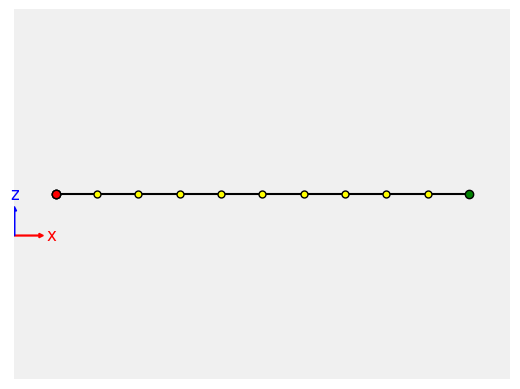

In [16]:
# get discretization
mesh = GNLexamples.leafSpring(b = 0.05, h = 0.001, M = M, n = 10, elType = B2D_LR) 

# plot discretization
mesh.plotMesh()

#### Lösen und Darstellung 

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


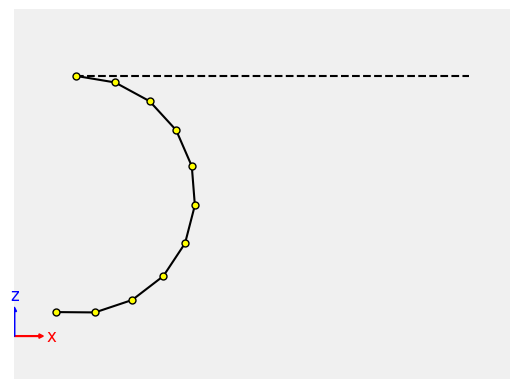

(<matplotlib.lines.Line2D at 0x20f4ad59d10>,)

In [17]:
# lösen
sol = FEMsolve.LoadCon(mesh, numInc = 10)

# ploten der Verformung
mesh.plotDisplacement(sol.u)

Verdrehung des Endquerschnittes

In [12]:
alpha0 = np.arange(0.1,180,5)

Element

In [13]:
elType = B2D_SR_ML

Berechnung

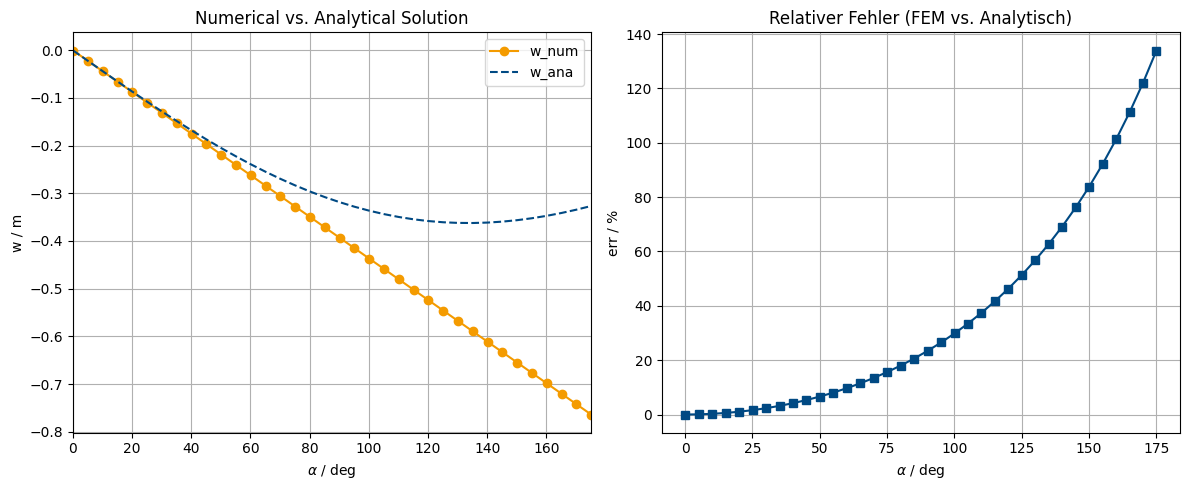

In [14]:
# vertical displacement of the free end
w_end = np.zeros(len(alpha0))       # numerische Lösung
w_ana = np.zeros(len(alpha0))       # analytische Lösung

# Schleife über verschiedene Verdrehungen
for i, alpha in enumerate(alpha0):
    # Moment
    M = E*I*alpha/180*np.pi/l
    # mesh
    mesh = GNLexamples.leafSpring(b = 0.05, h = 0.001, M = M, n = 10, elType = elType) 
    # Lösung
    sol = FEMsolve.LoadCon(mesh, numInc = 10)
    # Auswertung
    w_end[i] = sol.u[-2]
    w_ana[i] = (
        -M/(2*E*I)*l**2
        + (1/24)*M**3*l**4/(E*I)**3
        - (1/720)*M**5*l**6/(E*I)**5
        + (1/40320)*M**7*l**8/(E*I)**7
        - (1/3628800)*M**9*l**10/(E*I)**9
        + (1/479001600)*M**11*l**12/(E*I)**11
    )

# Ergebnisse nebeneinander plotten
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot numerische und analytische Lösung
axs[0].plot(alpha0, w_end, color=(244/255, 155/255, 0), marker='o', label='w_num')
axs[0].plot(alpha0, w_ana, color=(0/255, 73/255, 131/255), linestyle='--', label='w_ana')
axs[0].set_xlabel(r'$\alpha$ / deg')
axs[0].set_ylabel('w / m')
axs[0].legend()
axs[0].set_title('Numerical vs. Analytical Solution')
axs[0].grid(True)
axs[0].set_xlim(0, alpha0[-1])

# Plot relativer Fehler in Prozent
axs[1].plot(alpha0, 100*(w_end-w_ana)/w_ana, color=(0/255, 73/255, 131/255), marker='s')
axs[1].set_xlabel(r'$\alpha$ / deg')
axs[1].set_ylabel('err / %')
axs[1].set_title('Relativer Fehler (FEM vs. Analytisch)')
axs[1].grid(True)

plt.tight_layout()
plt.show()
